<a href="https://colab.research.google.com/github/evmpython/CAT010_UNIFEI_2024/blob/main/CAT010_Aula_08_Sondagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 8:** $\underline{Trabalhando\ com\ dados\ de\ Sondagens\ Estimadas\ por\ Satélite}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como baixar  e plotar dados de Sondagens estimados por Satélite e compará-los com observações.
Para isto será utilizado os dados da plataforma [*Giovanni*](https://giovanni.gsfc.nasa.gov/giovanni/#service=VtPf&starttime=&endtime=) e da Universidade de [*Wyoming University*](http://weather.uwyo.edu/upperair/sounding.html).

---


**DADOS DE ENTRADA**: Arquivos de radiossondagens de superfície e sondagens estimadas por satélite.

- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** g4.averaged.AIRS3STD_006_Temperature_A.20201224-20201224.43W_22S_43W_22S
- **Fonte dos dados:** FTP da [NASA](https://giovanni.gsfc.nasa.gov/giovanni/#service=VtPf&starttime=&endtime=)


---


**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. Fig_1_obs.jpg
    2. Fig_2_sat.jpg
    3. Fig_3_comparacao_obs_sat.jpg





---







**METODOLOGIA:** Serão abordados os seguintes tópicos:

1.   Download dos dados  observados de uma sondagem atmosférica para um determinada data/horário;
2.   Download dos dados estimados por satélite para a mesma data/horário na Platadorma [*Giovanni*](https://giovanni.gsfc.nasa.gov/giovanni/#service=VtPf&starttime=&endtime=);
3. Comparar a sondagem do satélite com a radiossondagem observada.



---


**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação da biblioteca Siphon
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Insere data da radiossondagem
6.   Baixa os dados de radiossondagem
7.   Plota o perfil de temperatura da radiossondagem
8.   Plota o perfil de temperatura do satélite
9.   Plota o perfil de comparação da temperatura observada e satélite


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive
    - 2. Baixar os dados de sondagem do satélite. Ver video explicando como baixar os dados. Para isto basta clicar [aqui](https://drive.google.com/file/d/19YVCARfwuAeBDZ38xw9nQ-lM3jB-Pg6a/view?usp=sharing).

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 03/12/2024


---

# **1° Passo:** Instalando o `Siphon`
O [`Siphon`](https://unidata.github.io/siphon/latest/index.html#) é um pacote que reúne uma coleção de funcionalidades que permitem o acesso de alguns bancos de dados meteorológicos. Para a nossa aula prática, vamos acessar o banco de dados de radiossondagens mantido pela [*Wyoming University*](http://weather.uwyo.edu/upperair/sounding.html).

Outros bancos de dados:
* *Integrated Global Radiosonde Archive version 2* (IGRA v2);
* *Iowa State’s upper air archive*;
* *National Data Buoy Center* (NDBC).

Vamos instalar o `Siphon` no **Colab**:

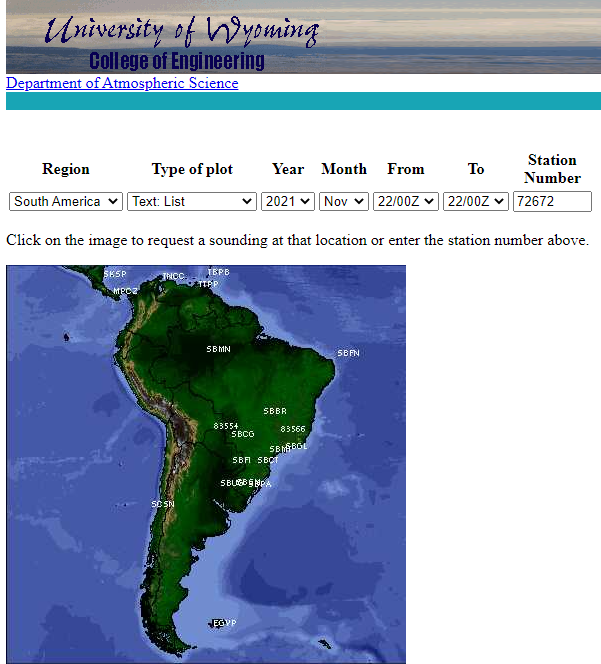

In [ ]:
!pip install -q siphon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 4.2 MB/s eta 0:00:00


# **2° Passo:** Download dos dados de satélite

- Para os dados de sondagens por satélite utlizaremos as informações fornecidas pelo sensor [Atmospheric Infra-Red Sounder(AIRS)](https://space.oscar.wmo.int/instruments/view/airs) que esta abordo do satélite polar AQUA.

- Os dados utilizados nessa etapa foram baixados da Plataforma [*Giovanni*](https://giovanni.gsfc.nasa.gov/giovanni/#service=VtPf&starttime=&endtime=) e realizado o upload no github. Para aprender como baixar os dados do sensor AIRS veja o vídeo explicativo, clicando [aqui](https://drive.google.com/file/d/19YVCARfwuAeBDZ38xw9nQ-lM3jB-Pg6a/view?usp=sharing).

In [ ]:
# baixando o arquivo da passagem ASCENDENTE (passagem DIURNA)
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_A.20201224-20201224.43W_22S_43W_22S.nc

--2024-12-03 20:30:32--  https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_A.20201224-20201224.43W_22S_43W_22S.nc
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2024/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_A.20201224-20201224.43W_22S_43W_22S.nc [following]
--2024-12-03 20:30:32--  https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2024/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_A.20201224-20201224.43W_22S_43W_22S.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27128 (26K) [ap

In [ ]:
# baixando o arquivo da passagem DESCENDENTE (passagem NOTURNA)
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_D.20201224-20201224.43W_22S_43W_22S.nc

--2024-12-03 20:30:32--  https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_D.20201224-20201224.43W_22S_43W_22S.nc
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2024/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_D.20201224-20201224.43W_22S_43W_22S.nc [following]
--2024-12-03 20:30:33--  https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2024/main/input/aula_08/g4.averaged.AIRS3STD_006_Temperature_D.20201224-20201224.43W_22S_43W_22S.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27134 (26K) [ap

# **3° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_08_SONDAGENS/'

- Criando a pasta de saída ("output")

In [ ]:
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **5° Passo:** Importando as bibliotecas

In [ ]:
from siphon.simplewebservice.wyoming import WyomingUpperAir  # biblioteca siphon para baixar os dados de radiossodagens
import matplotlib.pyplot as plt                              # biblioteca para plotar gráficos
import pandas as pd                                          # biblioteca para trabalhar com tabelas
import numpy as np                                           # biblioteca para trabalhar com matrizes
import xarray as xr                                          # biblioteca para ler arquivos netcdf
from datetime import datetime                                # biblioteca para trabalhar com datas

# vamos ignorar avisos no código
import warnings
warnings.filterwarnings("ignore")

# **PARTE 1):** Insira a **data** e **sigla** da estação  - **### >>> MUDANÇAS AQUI <<< ###**

**SIGLA DA ESTAÇÃO**

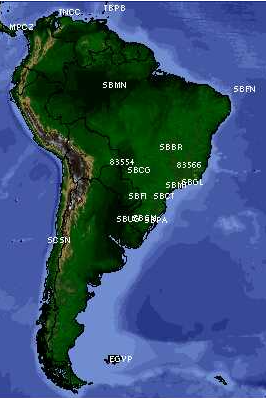

In [ ]:
nome_estacao = 'SBMT'

# Exemplos de estações com sigla e código
# Galeao.........: SBGL ou 83746
# SP-Marte.......: SBMT ou 83779
# BR.............: SBBR ou 83378
# Curitiba.......: SBCT ou 83840
# Florianopolis..: SBFL ou 83899
# Uberlândia......:SBUL ou 83525

**DATA**

 - Iremos baixar os dados do dia 24 de dezembro de 2020 às 12 UTC.

In [ ]:
ano = 2020
mes = 12
dia = 24
hor = 12

# **PARTE 2):** Baixando os dados Observados

**Baixando os dados da radiossondagem em formato de tabela (DataFrame)**

In [ ]:
df_estacao = WyomingUpperAir.request_data(datetime(ano, mes, dia, hor),
                                          nome_estacao)

**Exibindo a tabela de dados**

In [ ]:
df_estacao

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,933.0,722,22.4,15.4,100.0,10.0,-9.848078,1.736482e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
1,925.0,798,20.2,15.2,90.0,10.0,-10.000000,-6.123234e-16,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
2,922.0,826,19.8,14.9,89.0,10.0,-9.998477,-1.745241e-01,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
3,902.0,1014,18.1,14.6,85.0,11.0,-10.958142,-9.587132e-01,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
4,879.0,1235,16.0,14.2,105.0,12.0,-11.591110,3.105829e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,31.0,23616,-59.0,-88.8,65.0,18.0,-16.313540,-7.607129e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
80,30.0,23820,-58.5,-88.5,100.0,19.0,-18.711347,3.299315e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
81,27.0,24486,-57.2,-87.7,120.0,21.0,-18.186533,1.050000e+01,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
82,24.0,25231,-55.9,-86.8,85.0,30.0,-29.885841,-2.614672e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96


**Exibindo uma coluna da tabela de dados**

In [ ]:
df_estacao['temperature']

,temperature
0,22.4
1,20.2
2,19.8
3,18.1
4,16.0
...,...
79,-59.0
80,-58.5
81,-57.2
82,-55.9


**Plotando gráfico:** temperatura do ar de maneira simples

<Axes: >

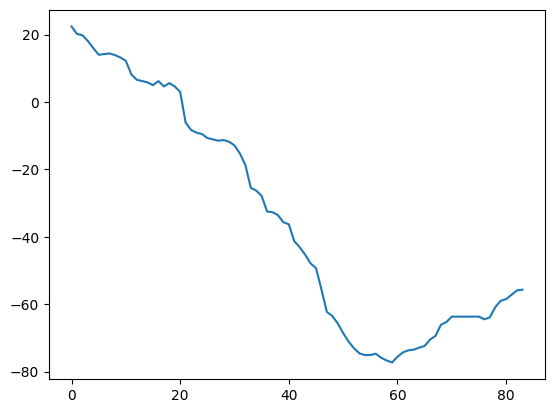

In [ ]:
df_estacao['temperature'].plot()

**Plotando gráfico:** temperatura do ar de maneira completa

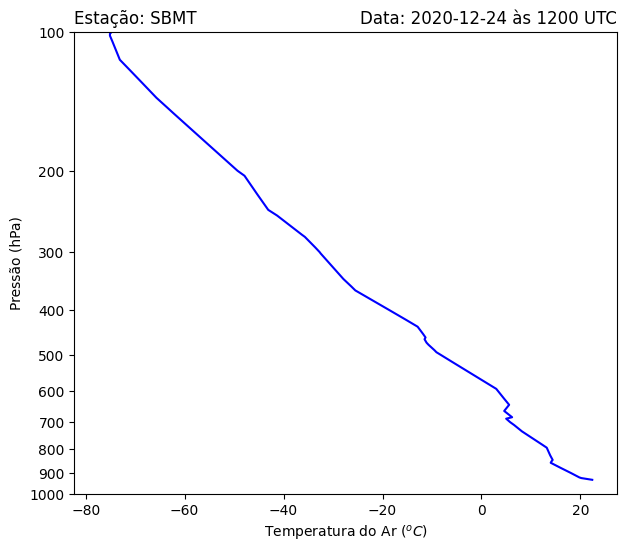

In [ ]:
# importa biblioteca. Maiores informações: https://matplotlib.org/stable/api/ticker_api.html
from matplotlib.ticker import (MultipleLocator, NullFormatter, ScalarFormatter)

# cria a moldura da figura
fig, ax = plt.subplots(figsize=(7,6))

# perfil de temperatura
ax.semilogy(df_estacao['temperature'],
            df_estacao['pressure'],
            color='blue')

# formatação dos eixos
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())

# ticks no eixo y
ax.set_yticks(np.linspace(100, 1000, 10))

# limite em y (Limitando o limite do Skew-T)
ax.set_ylim(100, 1000)

# inverter eixo y
plt.gca().invert_yaxis()

# título da Figura
ax.set_title(f'Estação: {nome_estacao}', loc='left')
ax.set_title(f'Data: {str(ano)}-{str(mes)}-{str(dia)} às {str(hor)}00 UTC', loc='right')

# nomes dos eixos
ax.set_ylabel('Pressão (hPa)')
ax.set_xlabel('Temperatura do Ar ($^{o}C$)')

# salva figura
plt.savefig(f'{dir}output/Fig_1_estacao_{ano}{mes}{dia}.jpg')

# mostra figura
plt.show()

**Extraindo a latitude e longitude da tabela**

In [ ]:
lat, lon = df_estacao[['latitude']], df_estacao[['longitude']]

In [ ]:
lat

,latitude
0,-23.52
1,-23.52
2,-23.52
3,-23.52
4,-23.52
...,...
79,-23.52
80,-23.52
81,-23.52
82,-23.52


In [ ]:
lon

,longitude
0,-46.63
1,-46.63
2,-46.63
3,-46.63
4,-46.63
...,...
79,-46.63
80,-46.63
81,-46.63
82,-46.63


**Cria um retângulo com a região da Radiossondagem observada**

**#### OBSERVAÇÃO: ####**
O retângulo será utilizado para baixar os dados de satélite

In [ ]:
ret = [float(lon.min())-1, float(lat.min())-1, float(lon.max())+1, float(lat.max())+1]

In [ ]:
ret

[-47.63, -24.52, -45.63, -22.52]

# **PARTE 3):** Plotando os dados estimados por satélite

**Lendo o dado NETCDF baixado**

In [ ]:
# passagem NOTURNA (nodo DESCENDENTE)
data_night = xr.open_dataset('/content/g4.averaged.AIRS3STD_006_Temperature_D.20201224-20201224.43W_22S_43W_22S.nc')

In [ ]:
# passagem DIURNA (nodo ASCENDENTE)
data_day = xr.open_dataset('/content/g4.averaged.AIRS3STD_006_Temperature_A.20201224-20201224.43W_22S_43W_22S.nc')

**Display das Variáveis**

In [ ]:
data_night

<xarray.Dataset> Size: 244B
Dimensions:                     (TempPrsLvls_D: 24, latv: 2, lonv: 2)
Coordinates:
  * TempPrsLvls_D               (TempPrsLvls_D) float32 96B 1e+03 925.0 ... 1.0
Dimensions without coordinates: latv, lonv
Data variables:
    AIRS3STD_006_Temperature_D  (TempPrsLvls_D) float32 96B ...
    dataday                     int32 4B ...
    lat                         float64 8B ...
    lat_bnds                    (latv) float64 16B ...
    lon                         float64 8B ...
    lon_bnds                    (lonv) float64 16B ...
Attributes: (12/17)
    Conventions:               CF-1.4
    temporal_resolution:       daily
    nco_openmp_thread_number:  1
    starttime:                 2020-12-24T00:00:00Z
    endtime:                   2020-12-24T23:59:59Z
    bounding_box:              -43.35,-22.91,-43.15,-22.71
    ...                        ...
    plot_hint_title:           Vertical Profile of Air Temperature (Nighttime...
    plot_hint_subtitle:        over 2020-12-24, Region 43.35W, 22.91S, 43.15W...
    plot_hint_y_axis_label:    Pressure Levels Temperature Profile, nighttime...
    NCO:                       netCDF Operators version 4.7.8 (Homepage = htt...
    history:                   Fri Dec  3 13:43:39 2021: /usr/bin/ncatted -a ...
    plot_hint_x_axis_label:    K

In [ ]:
# mostra o dataset de dados
data_night['AIRS3STD_006_Temperature_D']

<xarray.DataArray 'AIRS3STD_006_Temperature_D' (TempPrsLvls_D: 24)> Size: 96B
[24 values with dtype=float32]
Coordinates:
  * TempPrsLvls_D  (TempPrsLvls_D) float32 96B 1e+03 925.0 850.0 ... 2.0 1.5 1.0
Attributes:
    standard_name:       air_temperature
    quantity_type:       Air Temperature
    product_short_name:  AIRS3STD
    product_version:     006
    long_name:           Air Temperature (Nighttime/Descending, AIRS-only)
    units:               K
    cell_methods:        lat, lon: mean time: mean

In [ ]:
# mostra a temperatura em Kelvin
data_night['AIRS3STD_006_Temperature_D'].values

array([      nan,       nan,       nan, 280.8125 , 274.9375 , 267.125  ,
       255.5    , 240.28125, 231.46875, 221.5625 , 209.28125, 196.25   ,
       198.03125, 206.84375, 214.03125, 217.75   , 221.40625, 227.3125 ,
       233.15625, 239.71875, 251.4375 , 260.0625 , 263.875  , 266.     ],
      dtype=float32)

In [ ]:
# mostra os niveis em hPa
data_day['TempPrsLvls_A'].values

array([1000. ,  925. ,  850. ,  700. ,  600. ,  500. ,  400. ,  300. ,
        250. ,  200. ,  150. ,  100. ,   70. ,   50. ,   30. ,   20. ,
         15. ,   10. ,    7. ,    5. ,    3. ,    2. ,    1.5,    1. ],
      dtype=float32)

In [ ]:
# mostra a latitude
data_day['lat'].values

array(-22.5)

In [ ]:
# mostra a longitude
data_day['lon'].values

array(-43.5)

In [ ]:
# mostra os limites da latitude
data_day['lat_bnds'].values

array([-23., -22.])

In [ ]:
# mostra os limites da longitude
data_day['lon_bnds'].values

array([-44., -43.])

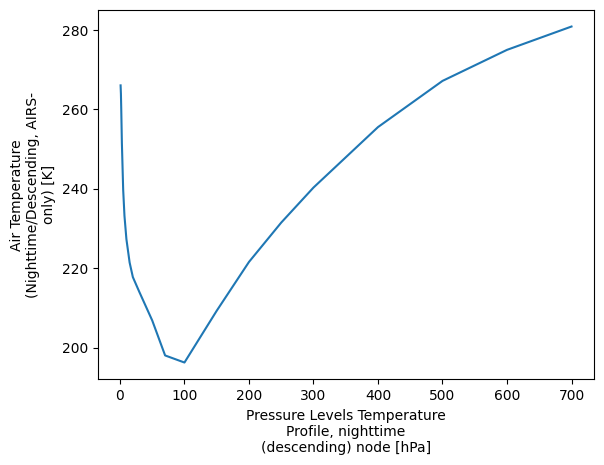

In [ ]:
# plot simples da temperatura
data_night['AIRS3STD_006_Temperature_D'].plot()

In [ ]:
data_day

<xarray.Dataset> Size: 244B
Dimensions:                     (TempPrsLvls_A: 24, latv: 2, lonv: 2)
Coordinates:
  * TempPrsLvls_A               (TempPrsLvls_A) float32 96B 1e+03 925.0 ... 1.0
Dimensions without coordinates: latv, lonv
Data variables:
    AIRS3STD_006_Temperature_A  (TempPrsLvls_A) float32 96B ...
    dataday                     int32 4B ...
    lat                         float64 8B -22.5
    lat_bnds                    (latv) float64 16B -23.0 -22.0
    lon                         float64 8B -43.5
    lon_bnds                    (lonv) float64 16B -44.0 -43.0
Attributes: (12/17)
    Conventions:               CF-1.4
    temporal_resolution:       daily
    nco_openmp_thread_number:  1
    starttime:                 2020-12-24T00:00:00Z
    endtime:                   2020-12-24T23:59:59Z
    bounding_box:              -43.35,-22.91,-43.15,-22.71
    ...                        ...
    plot_hint_title:           Vertical Profile of Air Temperature (Daytime/A...
    plot_hint_subtitle:        over 2020-12-24, Region 43.35W, 22.91S, 43.15W...
    plot_hint_y_axis_label:    Pressure Levels Temperature Profile, daytime (...
    NCO:                       netCDF Operators version 4.7.8 (Homepage = htt...
    history:                   Fri Dec  3 13:43:38 2021: /usr/bin/ncatted -a ...
    plot_hint_x_axis_label:    K

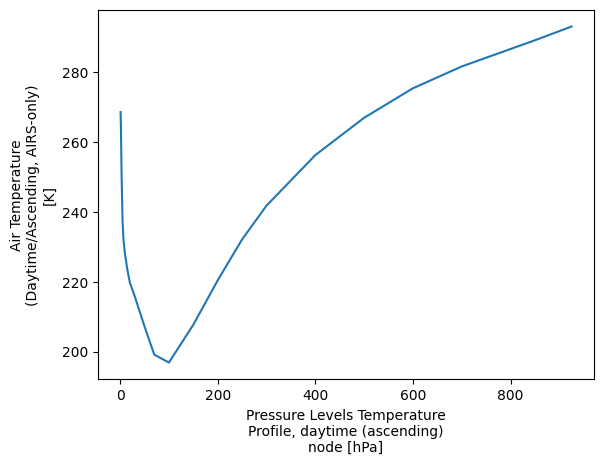

In [ ]:
data_day['AIRS3STD_006_Temperature_A'].plot()

**Plota o Perfil Vertical de Temperatura estimado pelo Satélite**

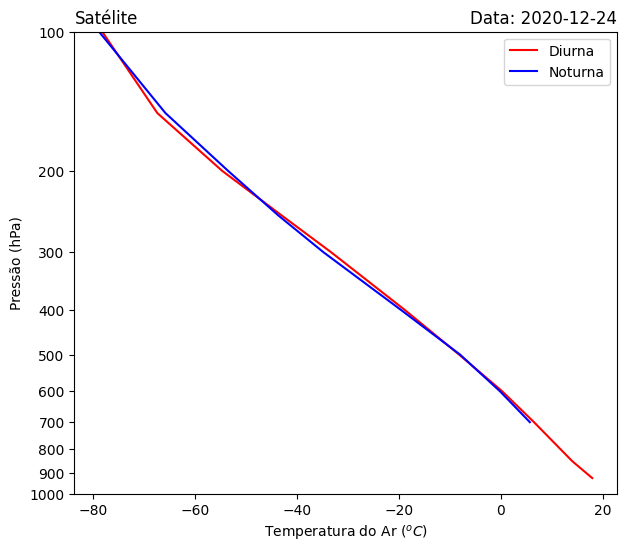

In [ ]:
# importa biblioteca
from matplotlib.ticker import (MultipleLocator, NullFormatter, ScalarFormatter)

# cria a moldura da figura
fig, ax = plt.subplots(figsize=(7,6))

# perfil de temperatura: ASCENDENTE
ax.semilogy(data_day['AIRS3STD_006_Temperature_A']-275.15,
            data_day['TempPrsLvls_A'],
            color='red',
            label='Diurna')

# perfil de temperatura: DESCENDENTE
ax.semilogy(data_night['AIRS3STD_006_Temperature_D']-275.15,
            data_night['TempPrsLvls_D'],
            color='blue',
            label='Noturna')

# formatação dos eixos
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())

# ticks no eixo y
ax.set_yticks(np.linspace(100, 1000, 10))

# limite em y (imitando o limite do Skew-T)
ax.set_ylim(100, 1000)

# inverter eixo y
plt.gca().invert_yaxis()

# título da Figura
ax.set_title('Satélite', loc='left')
ax.set_title(f'Data: {str(ano)}-{str(mes)}-{str(dia)}', loc='right')

# nomes dos eixos
ax.set_ylabel('Pressão (hPa)')
ax.set_xlabel('Temperatura do Ar ($^{o}C$)')

# legenda
ax.legend()

# salva figura
plt.savefig(f'{dir}output/Fig_2_satelite_{ano}{mes}{dia}.jpg')

# mostra figura
plt.show()

# **PARTE 4):** Comparação entre os dados observados e estimados por satélite

In [ ]:
df_estacao

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,933.0,722,22.4,15.4,100.0,10.0,-9.848078,1.736482e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
1,925.0,798,20.2,15.2,90.0,10.0,-10.000000,-6.123234e-16,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
2,922.0,826,19.8,14.9,89.0,10.0,-9.998477,-1.745241e-01,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
3,902.0,1014,18.1,14.6,85.0,11.0,-10.958142,-9.587132e-01,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
4,879.0,1235,16.0,14.2,105.0,12.0,-11.591110,3.105829e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,31.0,23616,-59.0,-88.8,65.0,18.0,-16.313540,-7.607129e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
80,30.0,23820,-58.5,-88.5,100.0,19.0,-18.711347,3.299315e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
81,27.0,24486,-57.2,-87.7,120.0,21.0,-18.186533,1.050000e+01,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96
82,24.0,25231,-55.9,-86.8,85.0,30.0,-29.885841,-2.614672e+00,SBMT,83779,2020-12-24 12:00:00,-23.52,-46.63,722.0,26.96


**Vamos utilizar o dado: "data_day" para comparar com a observação às 12 UTC**

In [ ]:
data_day

<xarray.Dataset> Size: 244B
Dimensions:                     (TempPrsLvls_A: 24, latv: 2, lonv: 2)
Coordinates:
  * TempPrsLvls_A               (TempPrsLvls_A) float32 96B 1e+03 925.0 ... 1.0
Dimensions without coordinates: latv, lonv
Data variables:
    AIRS3STD_006_Temperature_A  (TempPrsLvls_A) float32 96B nan 293.1 ... 268.6
    dataday                     int32 4B ...
    lat                         float64 8B -22.5
    lat_bnds                    (latv) float64 16B -23.0 -22.0
    lon                         float64 8B -43.5
    lon_bnds                    (lonv) float64 16B -44.0 -43.0
Attributes: (12/17)
    Conventions:               CF-1.4
    temporal_resolution:       daily
    nco_openmp_thread_number:  1
    starttime:                 2020-12-24T00:00:00Z
    endtime:                   2020-12-24T23:59:59Z
    bounding_box:              -43.35,-22.91,-43.15,-22.71
    ...                        ...
    plot_hint_title:           Vertical Profile of Air Temperature (Daytime/A...
    plot_hint_subtitle:        over 2020-12-24, Region 43.35W, 22.91S, 43.15W...
    plot_hint_y_axis_label:    Pressure Levels Temperature Profile, daytime (...
    NCO:                       netCDF Operators version 4.7.8 (Homepage = htt...
    history:                   Fri Dec  3 13:43:38 2021: /usr/bin/ncatted -a ...
    plot_hint_x_axis_label:    K

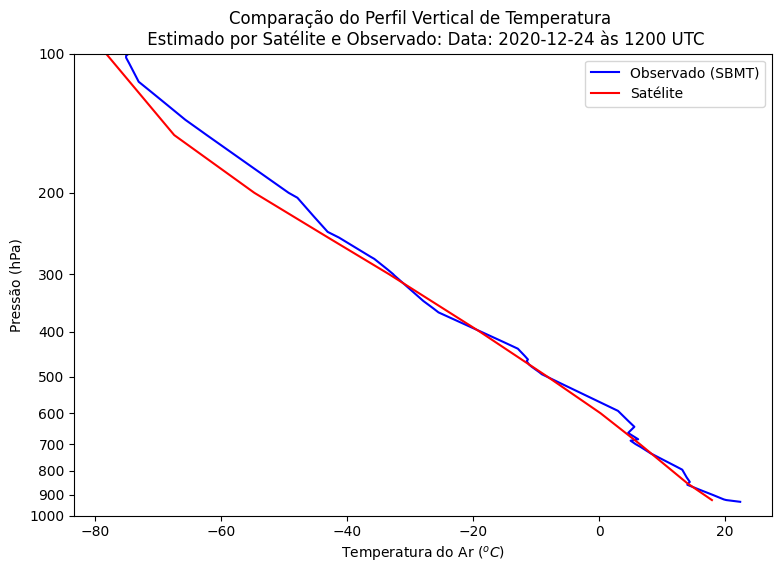

In [ ]:
# importa biblioteca
from matplotlib.ticker import (MultipleLocator, NullFormatter, ScalarFormatter)

# cria a moldura da figura
fig, ax = plt.subplots(figsize=(9,6))

# perfil de temperatura: ESTAÇÃO
obs, = ax.semilogy(df_estacao['temperature'],
                   df_estacao['pressure'],
                   color='blue',
                   label = f'Observado ({nome_estacao})')

# perfil de temperatura: SATÉLITE
sat, = ax.semilogy(data_day['AIRS3STD_006_Temperature_A']-275.15,
                   data_day['TempPrsLvls_A'],
                   color='red',
                   label= 'Satélite')

# formatação dos eixos
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())

# ticks no eixo y
ax.set_yticks(np.linspace(100, 1000, 10))

# limite em y (imitando o limite do Skew-T)
ax.set_ylim(100, 1000)

# inverter eixo y
plt.gca().invert_yaxis()

# título da figura
ax.set_title(f'Comparação do Perfil Vertical de Temperatura \n Estimado por Satélite e Observado: Data: {str(ano)}-{str(mes)}-{str(dia)} às {str(hor)}00 UTC')

# nomes ds eixos
ax.set_ylabel('Pressão (hPa)')
ax.set_xlabel('Temperatura do Ar ($^{o}C$)')

# legenda
ax.legend(handles = [obs, sat])

# salva figura
plt.savefig(f'{dir}output/Fig_3_comparacao_estacao_e_satelite_{ano}{mes}{dia}.jpg')

# mostra figura
plt.show()

##**Salvando as informações em um CSV**

In [ ]:
df2 = df_estacao[['pressure','temperature']]
df2

,pressure,temperature
0,933.0,22.4
1,925.0,20.2
2,922.0,19.8
3,902.0,18.1
4,879.0,16.0
...,...,...
79,31.0,-59.0
80,30.0,-58.5
81,27.0,-57.2
82,24.0,-55.9


In [ ]:
df2.to_csv(f'{dir}output/{nome_estacao}_{ano}{mes}{dia}.csv', sep=';')

In [ ]:
niveis = data_day['TempPrsLvls_A'].values
temps = (data_day['AIRS3STD_006_Temperature_A'].values) - 273.15
df3 = pd.DataFrame({'pressure': niveis, 'temperature': temps})

In [ ]:
df3

,pressure,temperature
0,1000.0,NaN
1,925.0,19.912506
2,850.0,15.975006
3,700.0,8.475006
4,600.0,2.225006
5,500.0,-6.212494
6,400.0,-16.899994
7,300.0,-31.368744
8,250.0,-41.024994
9,200.0,-52.743744


In [ ]:
df3.to_csv(f'{dir}output/satelite_{ano}{mes}{dia}.csv',
           sep=';')

# **PARTE 5):** EXTRA - Calculando a temperatura média entre alguns níveis da atmosfera

In [ ]:
estacao = pd.read_csv(f'{dir}output/{nome_estacao}_{ano}{mes}{dia}.csv',
                           usecols=['pressure','temperature'],
                           sep=';')
estacao

,pressure,temperature
0,933.0,22.4
1,925.0,20.2
2,922.0,19.8
3,902.0,18.1
4,879.0,16.0
...,...,...
79,31.0,-59.0
80,30.0,-58.5
81,27.0,-57.2
82,24.0,-55.9


In [ ]:
satelite = pd.read_csv(f'{dir}output/satelite_{ano}{mes}{dia}.csv',
                            usecols=['pressure','temperature'],
                            sep=';')
satelite

,pressure,temperature
0,1000.0,NaN
1,925.0,19.912506
2,850.0,15.975006
3,700.0,8.475006
4,600.0,2.225006
5,500.0,-6.212494
6,400.0,-16.899994
7,300.0,-31.368744
8,250.0,-41.024994
9,200.0,-52.743744


**Filtrando a Temperatura média entre:**

1.   Superfície e 500 hPa
2.   500 e 200 hPa
3.   < 200 hPa



**Entre Superfície e 500 hPa**

In [ ]:
# sondagem
estacao_500 = estacao[ estacao['pressure'] >= 500 ]
estacao_500

,pressure,temperature
0,933.0,22.4
1,925.0,20.2
2,922.0,19.8
3,902.0,18.1
4,879.0,16.0
5,857.0,14.0
6,850.0,14.2
7,845.0,14.4
8,826.0,13.9
9,795.0,13.2


In [ ]:
estacao_mean500 = estacao_500['temperature'].mean()
estacao_mean500

9.556521739130433

In [ ]:
# estacao
estacao_500 = estacao[estacao['pressure'] >= 500]
estacao_mean500 = estacao_500['temperature'].mean()

# satélite
satelite_500 = satelite[satelite['pressure'] >= 500]
satelite_mean500 = satelite_500['temperature'].mean()

print(f'Temperatura Média entre a Superfície e 500 hPa (observado): {estacao_mean500}')
print(f'Temperatura Média entre a Superfície e 500 hPa (estimado por satélite): {satelite_mean500}')

Temperatura Média entre a Superfície e 500 hPa (observado): 9.556521739130433
Temperatura Média entre a Superfície e 500 hPa (estimado por satélite): 8.075006


**Entre 500 e 200 hPa**

In [ ]:
# estacao
estacao_500_200 = estacao[(estacao['pressure'] >= 200) & (estacao['pressure'] < 500)]
estacao_mean500_200 = estacao_500_200['temperature'].mean()

# satélite
satelite_500_200 = satelite[(satelite['pressure'] >= 200) & (satelite['pressure'] < 500)]
satelite_mean500_200 = satelite_500_200['temperature'].mean()

print(f'Temperatura Média entre 500 e 200 hPa (observado): {estacao_mean500_200}')
print(f'Temperatura Média entre 500 e 200 hPa (estimado por satélite): {satelite_mean500_200}')

Temperatura Média entre 500 e 200 hPa (observado): -26.05652173913043
Temperatura Média entre 500 e 200 hPa (estimado por satélite): -35.509369


**< 200 hPa**

In [ ]:
# estacao
estacao_200 = estacao[estacao['pressure'] < 200]
estacao_mean200 = estacao_200['temperature'].mean()

# satélite
satelite_200 = satelite[satelite['pressure'] < 200]
satelite_mean200 = satelite_200['temperature'].mean()

print(f'Temperatura Média acima de 200 hPa (observado): {estacao_mean200}')
print(f'Temperatura Média acima de 200 hPa (estimado por satélite): {satelite_mean200}')

Temperatura Média acima de 200 hPa (observado): -67.3894736842105
Temperatura Média acima de 200 hPa (estimado por satélite): -43.654458285714284
